In [1]:
from os.path import join
import matplotlib.pyplot as plt
import earthaccess

import geopandas as gpd
import rasters as rt

from harmonized_landsat_sentinel import harmonized_landsat_sentinel as HLS
from harmonized_landsat_sentinel import generate_HLS_timeseries

In [2]:
# Configure logging to see info messages
import logging
logging.basicConfig(level=logging.INFO, format='%(name)s - %(levelname)s - %(message)s')

date range

In [3]:
date_UTC = "2023-04-15"
start_date_UTC = "2022-08-01"
end_date_UTC = "2025-11-01"

download directory

In [4]:
download_directory = "~/data/HLS_download"

output directory

In [5]:
output_directory = "~/data/Kings Canyon HLS"

Upper Kings area of interest

In [6]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


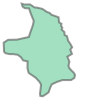

In [7]:
gdf.geometry[0]

In [8]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_76264/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=878372.1496506371, ymin=4058894.2146899896, xmax=917059.9433665382, ymax=4119262.3546824204, crs="EPSG:32610")

In [9]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1006,
    "cols": 644
  },
  "bbox": {
    "xmin": 878372.1496506371,
    "ymin": 4058902.3546824204,
    "xmax": 917012.1496506371,
    "ymax": 4119262.3546824204
  },
  "crs": "EPSG:32610",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [10]:
earthaccess.login(strategy="netrc", persist=True)

In [ ]:
filenames = generate_HLS_timeseries(
    start_date_UTC=start_date_UTC,
    end_date_UTC=end_date_UTC,
    geometry=grid,
    download_directory=download_directory,
    output_directory=output_directory
)

filenames

[2025-11-17 09:10:45 INFO] Generating HLS timeseries with parameters:
[2025-11-17 09:10:45 INFO]   Bands: red, green, blue, NIR, SWIR1, SWIR2
[2025-11-17 09:10:45 INFO]   Tiles: 11SLB, 11SLA
[2025-11-17 09:10:45 INFO]   Start date: 2022-08-01
[2025-11-17 09:10:45 INFO]   End date: 2025-11-01
[2025-11-17 09:10:45 INFO]   Output directory: ~/data/Kings Canyon HLS
[2025-11-17 09:10:45 INFO] Querying tile: 11SLB
[2025-11-17 09:10:45 INFO] started listing available HLS2 granules at tile 11SLB from 2022-08-01 to 2025-11-01
[2025-11-17 09:10:45 INFO] searching HLSS30.v2.0, HLSL30.v2.0 at 11SLB from 2022-07-16 to 2025-11-01
[2025-11-17 09:10:47 INFO] Currently storing 772 DataGranules for HLS2
[2025-11-17 09:10:48 INFO] finished listing available HLS2 granules at tile 11SLB from 2022-08-01 to 2025-11-01 (2.54)
[2025-11-17 09:10:48 INFO] 649 dates available for tile 11SLB:
[2025-11-17 09:10:48 INFO]   * 2022-08-01
[2025-11-17 09:10:48 INFO]   * 2022-08-02
[2025-11-17 09:10:48 INFO]   * 2022-08-

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.S30.T11SLB.2022213T18291

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:54 INFO] searching for Landsat tile 11SLB on 2022-08-01
[2025-11-17 09:10:54 INFO] retrieving Landsat tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLB.2022213T183408.v2.0
[2025-11-17 09:10:54 INFO]  Getting 1 granules, approx download size: 0.19 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B03.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:10:54 INFO] File HLS.L30.T11SLB.2022213T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:10:55 INFO] extracting band red for tile 11SLA on date 2022-08-01
[2025-11-17 09:10:55 INFO] searching for Sentinel tile 11SLA on 2022-08-01
[2025-11-17 09:10:55 INFO] retrieving Sentinel tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLA.2022213T182919.v2.0
[2025-11-17 09:10:55 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.S30.T11SLA.2022213T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:55 INFO] searching for Landsat tile 11SLA on 2022-08-01
[2025-11-17 09:10:55 INFO] retrieving Landsat tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLA.2022213T183408.v2.0
[2025-11-17 09:10:55 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SAA.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:10:55 INFO] File HLS.L30.T11SLA.2022213T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:10:57 INFO] extracting band green for tile 11SLB on date 2022-08-01
[2025-11-17 09:10:57 INFO] searching for Sentinel tile 11SLB on 2022-08-01
[2025-11-17 09:10:57 INFO] retrieving Sentinel tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLB.2022213T182919.v2.0
[2025-11-17 09:10:57 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.S30.T11SLB.2022213T18291

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:57 INFO] searching for Landsat tile 11SLB on 2022-08-01
[2025-11-17 09:10:57 INFO] retrieving Landsat tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLB.2022213T183408.v2.0
[2025-11-17 09:10:57 INFO]  Getting 1 granules, approx download size: 0.19 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B03.tif already downloaded
[2025-11-17 09:10:57 INFO] File HLS.L30.T11SLB.2022213T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:10:58 INFO] extracting band green for tile 11SLA on date 2022-08-01
[2025-11-17 09:10:58 INFO] searching for Sentinel tile 11SLA on 2022-08-01
[2025-11-17 09:10:58 INFO] retrieving Sentinel tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLA.2022213T182919.v2.0
[2025-11-17 09:10:58 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.S30.T11SLA.2022213T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:10:58 INFO] searching for Landsat tile 11SLA on 2022-08-01
[2025-11-17 09:10:58 INFO] retrieving Landsat tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLA.2022213T183408.v2.0
[2025-11-17 09:10:58 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SAA.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:10:58 INFO] File HLS.L30.T11SLA.2022213T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:00 INFO] extracting band blue for tile 11SLB on date 2022-08-01
[2025-11-17 09:11:00 INFO] searching for Sentinel tile 11SLB on 2022-08-01
[2025-11-17 09:11:00 INFO] retrieving Sentinel tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLB.2022213T182919.v2.0
[2025-11-17 09:11:00 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.S30.T11SLB.2022213T18291

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:00 INFO] searching for Landsat tile 11SLB on 2022-08-01
[2025-11-17 09:11:00 INFO] retrieving Landsat tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLB.2022213T183408.v2.0
[2025-11-17 09:11:00 INFO]  Getting 1 granules, approx download size: 0.19 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B03.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:00 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:01 INFO] extracting band blue for tile 11SLA on date 2022-08-01
[2025-11-17 09:11:01 INFO] searching for Sentinel tile 11SLA on 2022-08-01
[2025-11-17 09:11:01 INFO] retrieving Sentinel tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLA.2022213T182919.v2.0
[2025-11-17 09:11:01 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.S30.T11SLA.2022213T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:01 INFO] searching for Landsat tile 11SLA on 2022-08-01
[2025-11-17 09:11:01 INFO] retrieving Landsat tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLA.2022213T183408.v2.0
[2025-11-17 09:11:01 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:01 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B03.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:03 INFO] extracting band NIR for tile 11SLB on date 2022-08-01
[2025-11-17 09:11:03 INFO] searching for Sentinel tile 11SLB on 2022-08-01
[2025-11-17 09:11:03 INFO] retrieving Sentinel tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLB.2022213T182919.v2.0
[2025-11-17 09:11:03 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.S30.T11SLB.2022213T18291

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:03 INFO] searching for Landsat tile 11SLB on 2022-08-01
[2025-11-17 09:11:03 INFO] retrieving Landsat tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLB.2022213T183408.v2.0
[2025-11-17 09:11:03 INFO]  Getting 1 granules, approx download size: 0.19 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B03.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:03 INFO] File HLS.L30.T11SLB.2022213T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:04 INFO] extracting band NIR for tile 11SLA on date 2022-08-01
[2025-11-17 09:11:04 INFO] searching for Sentinel tile 11SLA on 2022-08-01
[2025-11-17 09:11:04 INFO] retrieving Sentinel tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLA.2022213T182919.v2.0
[2025-11-17 09:11:04 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.S30.T11SLA.2022213T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:04 INFO] searching for Landsat tile 11SLA on 2022-08-01
[2025-11-17 09:11:04 INFO] retrieving Landsat tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLA.2022213T183408.v2.0
[2025-11-17 09:11:04 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:04 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B03.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:06 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-01
[2025-11-17 09:11:06 INFO] searching for Sentinel tile 11SLB on 2022-08-01
[2025-11-17 09:11:06 INFO] retrieving Sentinel tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLB.2022213T182919.v2.0
[2025-11-17 09:11:06 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.S30.T11SLB.2022213T18291

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:06 INFO] searching for Landsat tile 11SLB on 2022-08-01
[2025-11-17 09:11:06 INFO] retrieving Landsat tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLB.2022213T183408.v2.0
[2025-11-17 09:11:06 INFO]  Getting 1 granules, approx download size: 0.19 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B03.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:06 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:07 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-01
[2025-11-17 09:11:07 INFO] searching for Sentinel tile 11SLA on 2022-08-01
[2025-11-17 09:11:07 INFO] retrieving Sentinel tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLA.2022213T182919.v2.0
[2025-11-17 09:11:07 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.S30.T11SLA.2022213T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:07 INFO] searching for Landsat tile 11SLA on 2022-08-01
[2025-11-17 09:11:07 INFO] retrieving Landsat tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLA.2022213T183408.v2.0
[2025-11-17 09:11:07 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:07 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B03.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:09 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-01
[2025-11-17 09:11:09 INFO] searching for Sentinel tile 11SLB on 2022-08-01
[2025-11-17 09:11:09 INFO] retrieving Sentinel tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLB.2022213T182919.v2.0
[2025-11-17 09:11:09 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.S30.T11SLB.2022213T18291

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:09 INFO] searching for Landsat tile 11SLB on 2022-08-01
[2025-11-17 09:11:09 INFO] retrieving Landsat tile 11SLB on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLB.2022213T183408.v2.0
[2025-11-17 09:11:09 INFO]  Getting 1 granules, approx download size: 0.19 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B02.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B03.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:09 INFO] File HLS.L30.T11SLB.2022213T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:10 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-01
[2025-11-17 09:11:10 INFO] searching for Sentinel tile 11SLA on 2022-08-01
[2025-11-17 09:11:10 INFO] retrieving Sentinel tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.S30.T11SLA.2022213T182919.v2.0
[2025-11-17 09:11:10 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.S30.T11SLA.2022213T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:10 INFO] searching for Landsat tile 11SLA on 2022-08-01
[2025-11-17 09:11:10 INFO] retrieving Landsat tile 11SLA on 2022-08-01: ~/data/HLS_download/2022.08.01/HLS.L30.T11SLA.2022213T183408.v2.0
[2025-11-17 09:11:10 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B11.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B04.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B09.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B07.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B10.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B01.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B05.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B06.tif already downloaded
[2025-11-17 09:11:10 INFO] File HLS.L30.T11SLA.2022213T183408.v2.0.B03.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:12 INFO] extracting band red for tile 11SLB on date 2022-08-02
[2025-11-17 09:11:12 INFO] searching for Sentinel tile 11SLB on 2022-08-02
[2025-11-17 09:11:12 INFO] searching for Landsat tile 11SLB on 2022-08-02
[2025-11-17 09:11:12 INFO] retrieving Landsat tile 11SLB on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLB.2022214T182737.v2.0
[2025-11-17 09:11:12 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SZA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:12 INFO] extracting band red for tile 11SLA on date 2022-08-02
[2025-11-17 09:11:12 INFO] searching for Sentinel tile 11SLA on 2022-08-02
[2025-11-17 09:11:12 INFO] searching for Landsat tile 11SLA on 2022-08-02
[2025-11-17 09:11:12 INFO] retrieving Landsat tile 11SLA on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLA.2022214T182737.v2.0
[2025-11-17 09:11:12 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:12 INFO] File HLS.L30.T11SLA.2022214T18273

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:13 INFO] extracting band green for tile 11SLB on date 2022-08-02
[2025-11-17 09:11:13 INFO] searching for Sentinel tile 11SLB on 2022-08-02
[2025-11-17 09:11:13 INFO] searching for Landsat tile 11SLB on 2022-08-02
[2025-11-17 09:11:13 INFO] retrieving Landsat tile 11SLB on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLB.2022214T182737.v2.0
[2025-11-17 09:11:13 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLB.2022214T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:13 INFO] extracting band green for tile 11SLA on date 2022-08-02
[2025-11-17 09:11:13 INFO] searching for Sentinel tile 11SLA on 2022-08-02
[2025-11-17 09:11:13 INFO] searching for Landsat tile 11SLA on 2022-08-02
[2025-11-17 09:11:13 INFO] retrieving Landsat tile 11SLA on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLA.2022214T182737.v2.0
[2025-11-17 09:11:13 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:13 INFO] File HLS.L30.T11SLA.2022214T18273

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:14 INFO] extracting band blue for tile 11SLB on date 2022-08-02
[2025-11-17 09:11:14 INFO] searching for Sentinel tile 11SLB on 2022-08-02
[2025-11-17 09:11:14 INFO] searching for Landsat tile 11SLB on 2022-08-02
[2025-11-17 09:11:14 INFO] retrieving Landsat tile 11SLB on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLB.2022214T182737.v2.0
[2025-11-17 09:11:14 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLB.2022214T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:14 INFO] extracting band blue for tile 11SLA on date 2022-08-02
[2025-11-17 09:11:14 INFO] searching for Sentinel tile 11SLA on 2022-08-02
[2025-11-17 09:11:14 INFO] searching for Landsat tile 11SLA on 2022-08-02
[2025-11-17 09:11:14 INFO] retrieving Landsat tile 11SLA on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLA.2022214T182737.v2.0
[2025-11-17 09:11:14 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:14 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:15 INFO] extracting band NIR for tile 11SLB on date 2022-08-02
[2025-11-17 09:11:15 INFO] searching for Sentinel tile 11SLB on 2022-08-02
[2025-11-17 09:11:15 INFO] searching for Landsat tile 11SLB on 2022-08-02
[2025-11-17 09:11:15 INFO] retrieving Landsat tile 11SLB on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLB.2022214T182737.v2.0
[2025-11-17 09:11:15 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLB.2022214T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:15 INFO] extracting band NIR for tile 11SLA on date 2022-08-02
[2025-11-17 09:11:15 INFO] searching for Sentinel tile 11SLA on 2022-08-02
[2025-11-17 09:11:15 INFO] searching for Landsat tile 11SLA on 2022-08-02
[2025-11-17 09:11:15 INFO] retrieving Landsat tile 11SLA on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLA.2022214T182737.v2.0
[2025-11-17 09:11:15 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:15 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:16 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-02
[2025-11-17 09:11:16 INFO] searching for Sentinel tile 11SLB on 2022-08-02
[2025-11-17 09:11:16 INFO] searching for Landsat tile 11SLB on 2022-08-02
[2025-11-17 09:11:16 INFO] retrieving Landsat tile 11SLB on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLB.2022214T182737.v2.0
[2025-11-17 09:11:16 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLB.2022214T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:16 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-02
[2025-11-17 09:11:16 INFO] searching for Sentinel tile 11SLA on 2022-08-02
[2025-11-17 09:11:16 INFO] searching for Landsat tile 11SLA on 2022-08-02
[2025-11-17 09:11:16 INFO] retrieving Landsat tile 11SLA on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLA.2022214T182737.v2.0
[2025-11-17 09:11:16 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:16 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:17 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-02
[2025-11-17 09:11:17 INFO] searching for Sentinel tile 11SLB on 2022-08-02
[2025-11-17 09:11:17 INFO] searching for Landsat tile 11SLB on 2022-08-02
[2025-11-17 09:11:17 INFO] retrieving Landsat tile 11SLB on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLB.2022214T182737.v2.0
[2025-11-17 09:11:17 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B03.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLB.2022214T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:17 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-02
[2025-11-17 09:11:17 INFO] searching for Sentinel tile 11SLA on 2022-08-02
[2025-11-17 09:11:17 INFO] searching for Landsat tile 11SLA on 2022-08-02
[2025-11-17 09:11:17 INFO] retrieving Landsat tile 11SLA on 2022-08-02: ~/data/HLS_download/2022.08.02/HLS.L30.T11SLA.2022214T182737.v2.0
[2025-11-17 09:11:17 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B02.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B01.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B10.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B06.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B05.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B04.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B07.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B11.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T182737.v2.0.B09.tif already downloaded
[2025-11-17 09:11:17 INFO] File HLS.L30.T11SLA.2022214T18273

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] extracting band red for tile 11SLB on date 2022-08-04
[2025-11-17 09:11:18 INFO] searching for Sentinel tile 11SLB on 2022-08-04
[2025-11-17 09:11:18 INFO] retrieving Sentinel tile 11SLB on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLB.2022216T183919.v2.0
[2025-11-17 09:11:18 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLB.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] searching for Landsat tile 11SLB on 2022-08-04
[2025-11-17 09:11:18 INFO] extracting band red for tile 11SLA on date 2022-08-04
[2025-11-17 09:11:18 INFO] searching for Sentinel tile 11SLA on 2022-08-04
[2025-11-17 09:11:18 INFO] retrieving Sentinel tile 11SLA on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLA.2022216T183919.v2.0
[2025-11-17 09:11:18 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:18 INFO] File HLS.S30.T11SLA.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:18 INFO] searching for Landsat tile 11SLA on 2022-08-04
[2025-11-17 09:11:19 INFO] extracting band green for tile 11SLB on date 2022-08-04
[2025-11-17 09:11:19 INFO] searching for Sentinel tile 11SLB on 2022-08-04
[2025-11-17 09:11:19 INFO] retrieving Sentinel tile 11SLB on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLB.2022216T183919.v2.0
[2025-11-17 09:11:19 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLB.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:19 INFO] searching for Landsat tile 11SLB on 2022-08-04
[2025-11-17 09:11:19 INFO] extracting band green for tile 11SLA on date 2022-08-04
[2025-11-17 09:11:19 INFO] searching for Sentinel tile 11SLA on 2022-08-04
[2025-11-17 09:11:19 INFO] retrieving Sentinel tile 11SLA on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLA.2022216T183919.v2.0
[2025-11-17 09:11:19 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:19 INFO] File HLS.S30.T11SLA.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:19 INFO] searching for Landsat tile 11SLA on 2022-08-04
[2025-11-17 09:11:20 INFO] extracting band blue for tile 11SLB on date 2022-08-04
[2025-11-17 09:11:20 INFO] searching for Sentinel tile 11SLB on 2022-08-04
[2025-11-17 09:11:20 INFO] retrieving Sentinel tile 11SLB on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLB.2022216T183919.v2.0
[2025-11-17 09:11:20 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:20 INFO] File HLS.S30.T11SLB.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:20 INFO] searching for Landsat tile 11SLB on 2022-08-04
[2025-11-17 09:11:20 INFO] extracting band blue for tile 11SLA on date 2022-08-04
[2025-11-17 09:11:20 INFO] searching for Sentinel tile 11SLA on 2022-08-04
[2025-11-17 09:11:21 INFO] retrieving Sentinel tile 11SLA on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLA.2022216T183919.v2.0
[2025-11-17 09:11:21 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLA.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:21 INFO] searching for Landsat tile 11SLA on 2022-08-04
[2025-11-17 09:11:21 INFO] extracting band NIR for tile 11SLB on date 2022-08-04
[2025-11-17 09:11:21 INFO] searching for Sentinel tile 11SLB on 2022-08-04
[2025-11-17 09:11:21 INFO] retrieving Sentinel tile 11SLB on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLB.2022216T183919.v2.0
[2025-11-17 09:11:21 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:21 INFO] File HLS.S30.T11SLB.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:21 INFO] searching for Landsat tile 11SLB on 2022-08-04
[2025-11-17 09:11:22 INFO] extracting band NIR for tile 11SLA on date 2022-08-04
[2025-11-17 09:11:22 INFO] searching for Sentinel tile 11SLA on 2022-08-04
[2025-11-17 09:11:22 INFO] retrieving Sentinel tile 11SLA on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLA.2022216T183919.v2.0
[2025-11-17 09:11:22 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLA.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:22 INFO] searching for Landsat tile 11SLA on 2022-08-04
[2025-11-17 09:11:22 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-04
[2025-11-17 09:11:22 INFO] searching for Sentinel tile 11SLB on 2022-08-04
[2025-11-17 09:11:22 INFO] retrieving Sentinel tile 11SLB on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLB.2022216T183919.v2.0
[2025-11-17 09:11:22 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:22 INFO] File HLS.S30.T11SLB.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:22 INFO] searching for Landsat tile 11SLB on 2022-08-04
[2025-11-17 09:11:23 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-04
[2025-11-17 09:11:23 INFO] searching for Sentinel tile 11SLA on 2022-08-04
[2025-11-17 09:11:23 INFO] retrieving Sentinel tile 11SLA on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLA.2022216T183919.v2.0
[2025-11-17 09:11:23 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLA.2022216T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:23 INFO] searching for Landsat tile 11SLA on 2022-08-04
[2025-11-17 09:11:23 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-04
[2025-11-17 09:11:23 INFO] searching for Sentinel tile 11SLB on 2022-08-04
[2025-11-17 09:11:23 INFO] retrieving Sentinel tile 11SLB on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLB.2022216T183919.v2.0
[2025-11-17 09:11:23 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:23 INFO] File HLS.S30.T11SLB.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:23 INFO] searching for Landsat tile 11SLB on 2022-08-04
[2025-11-17 09:11:24 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-04
[2025-11-17 09:11:24 INFO] searching for Sentinel tile 11SLA on 2022-08-04
[2025-11-17 09:11:24 INFO] retrieving Sentinel tile 11SLA on 2022-08-04: ~/data/HLS_download/2022.08.04/HLS.S30.T11SLA.2022216T183919.v2.0
[2025-11-17 09:11:24 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLA.2022216T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:24 INFO] searching for Landsat tile 11SLA on 2022-08-04
[2025-11-17 09:11:24 INFO] extracting band red for tile 11SLB on date 2022-08-06
[2025-11-17 09:11:24 INFO] searching for Sentinel tile 11SLB on 2022-08-06
[2025-11-17 09:11:24 INFO] retrieving Sentinel tile 11SLB on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLB.2022218T182931.v2.0
[2025-11-17 09:11:24 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:24 INFO] File HLS.S30.T11SLB.2022218T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:24 INFO] searching for Landsat tile 11SLB on 2022-08-06
[2025-11-17 09:11:25 INFO] extracting band red for tile 11SLA on date 2022-08-06
[2025-11-17 09:11:25 INFO] searching for Sentinel tile 11SLA on 2022-08-06
[2025-11-17 09:11:25 INFO] retrieving Sentinel tile 11SLA on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLA.2022218T182931.v2.0
[2025-11-17 09:11:25 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLA.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:25 INFO] searching for Landsat tile 11SLA on 2022-08-06
[2025-11-17 09:11:25 INFO] extracting band green for tile 11SLB on date 2022-08-06
[2025-11-17 09:11:25 INFO] searching for Sentinel tile 11SLB on 2022-08-06
[2025-11-17 09:11:25 INFO] retrieving Sentinel tile 11SLB on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLB.2022218T182931.v2.0
[2025-11-17 09:11:25 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:25 INFO] File HLS.S30.T11SLB.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:25 INFO] searching for Landsat tile 11SLB on 2022-08-06
[2025-11-17 09:11:26 INFO] extracting band green for tile 11SLA on date 2022-08-06
[2025-11-17 09:11:26 INFO] searching for Sentinel tile 11SLA on 2022-08-06
[2025-11-17 09:11:26 INFO] retrieving Sentinel tile 11SLA on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLA.2022218T182931.v2.0
[2025-11-17 09:11:26 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLA.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:26 INFO] searching for Landsat tile 11SLA on 2022-08-06
[2025-11-17 09:11:26 INFO] extracting band blue for tile 11SLB on date 2022-08-06
[2025-11-17 09:11:26 INFO] searching for Sentinel tile 11SLB on 2022-08-06
[2025-11-17 09:11:26 INFO] retrieving Sentinel tile 11SLB on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLB.2022218T182931.v2.0
[2025-11-17 09:11:26 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:26 INFO] File HLS.S30.T11SLB.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:26 INFO] searching for Landsat tile 11SLB on 2022-08-06
[2025-11-17 09:11:27 INFO] extracting band blue for tile 11SLA on date 2022-08-06
[2025-11-17 09:11:27 INFO] searching for Sentinel tile 11SLA on 2022-08-06
[2025-11-17 09:11:27 INFO] retrieving Sentinel tile 11SLA on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLA.2022218T182931.v2.0
[2025-11-17 09:11:27 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLA.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:27 INFO] searching for Landsat tile 11SLA on 2022-08-06
[2025-11-17 09:11:27 INFO] extracting band NIR for tile 11SLB on date 2022-08-06
[2025-11-17 09:11:27 INFO] searching for Sentinel tile 11SLB on 2022-08-06
[2025-11-17 09:11:27 INFO] retrieving Sentinel tile 11SLB on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLB.2022218T182931.v2.0
[2025-11-17 09:11:27 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:27 INFO] File HLS.S30.T11SLB.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:27 INFO] searching for Landsat tile 11SLB on 2022-08-06
[2025-11-17 09:11:28 INFO] extracting band NIR for tile 11SLA on date 2022-08-06
[2025-11-17 09:11:28 INFO] searching for Sentinel tile 11SLA on 2022-08-06
[2025-11-17 09:11:28 INFO] retrieving Sentinel tile 11SLA on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLA.2022218T182931.v2.0
[2025-11-17 09:11:28 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLA.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:28 INFO] searching for Landsat tile 11SLA on 2022-08-06
[2025-11-17 09:11:28 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-06
[2025-11-17 09:11:28 INFO] searching for Sentinel tile 11SLB on 2022-08-06
[2025-11-17 09:11:28 INFO] retrieving Sentinel tile 11SLB on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLB.2022218T182931.v2.0
[2025-11-17 09:11:28 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:28 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLB.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:29 INFO] searching for Landsat tile 11SLB on 2022-08-06
[2025-11-17 09:11:29 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-06
[2025-11-17 09:11:29 INFO] searching for Sentinel tile 11SLA on 2022-08-06
[2025-11-17 09:11:29 INFO] retrieving Sentinel tile 11SLA on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLA.2022218T182931.v2.0
[2025-11-17 09:11:29 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:29 INFO] File HLS.S30.T11SLA.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:29 INFO] searching for Landsat tile 11SLA on 2022-08-06
[2025-11-17 09:11:29 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-06
[2025-11-17 09:11:29 INFO] searching for Sentinel tile 11SLB on 2022-08-06
[2025-11-17 09:11:30 INFO] retrieving Sentinel tile 11SLB on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLB.2022218T182931.v2.0
[2025-11-17 09:11:30 INFO]  Getting 1 granules, approx download size: 0.11 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182931.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLB.2022218T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:30 INFO] searching for Landsat tile 11SLB on 2022-08-06
[2025-11-17 09:11:30 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-06
[2025-11-17 09:11:30 INFO] searching for Sentinel tile 11SLA on 2022-08-06
[2025-11-17 09:11:30 INFO] retrieving Sentinel tile 11SLA on 2022-08-06: ~/data/HLS_download/2022.08.06/HLS.S30.T11SLA.2022218T182931.v2.0
[2025-11-17 09:11:30 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T182931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:30 INFO] File HLS.S30.T11SLA.2022218T18293

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:30 INFO] searching for Landsat tile 11SLA on 2022-08-06
[2025-11-17 09:11:30 INFO] extracting band red for tile 11SLB on date 2022-08-09
[2025-11-17 09:11:30 INFO] searching for Sentinel tile 11SLB on 2022-08-09
[2025-11-17 09:11:31 INFO] retrieving Sentinel tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLB.2022221T183931.v2.0
[2025-11-17 09:11:31 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.S30.T11SLB.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:31 INFO] searching for Landsat tile 11SLB on 2022-08-09
[2025-11-17 09:11:31 INFO] retrieving Landsat tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLB.2022221T183352.v2.0
[2025-11-17 09:11:31 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B04.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:31 INFO] File HLS.L30.T11SLB.2022221T18335

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:32 INFO] extracting band red for tile 11SLA on date 2022-08-09
[2025-11-17 09:11:32 INFO] searching for Sentinel tile 11SLA on 2022-08-09
[2025-11-17 09:11:32 INFO] retrieving Sentinel tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLA.2022221T183931.v2.0
[2025-11-17 09:11:32 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:38 INFO] searching for Landsat tile 11SLA on 2022-08-09
[2025-11-17 09:11:38 INFO] retrieving Landsat tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLA.2022221T183352.v2.0
[2025-11-17 09:11:38 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:43 INFO] extracting band green for tile 11SLB on date 2022-08-09
[2025-11-17 09:11:43 INFO] searching for Sentinel tile 11SLB on 2022-08-09
[2025-11-17 09:11:43 INFO] retrieving Sentinel tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLB.2022221T183931.v2.0
[2025-11-17 09:11:43 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.S30.T11SLB.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:44 INFO] searching for Landsat tile 11SLB on 2022-08-09
[2025-11-17 09:11:44 INFO] retrieving Landsat tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLB.2022221T183352.v2.0
[2025-11-17 09:11:44 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B04.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:44 INFO] File HLS.L30.T11SLB.2022221T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:45 INFO] extracting band green for tile 11SLA on date 2022-08-09
[2025-11-17 09:11:45 INFO] searching for Sentinel tile 11SLA on 2022-08-09
[2025-11-17 09:11:45 INFO] retrieving Sentinel tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLA.2022221T183931.v2.0
[2025-11-17 09:11:45 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.S30.T11SLA.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:45 INFO] searching for Landsat tile 11SLA on 2022-08-09
[2025-11-17 09:11:45 INFO] retrieving Landsat tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLA.2022221T183352.v2.0
[2025-11-17 09:11:45 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B02.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:45 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B04.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:46 INFO] extracting band blue for tile 11SLB on date 2022-08-09
[2025-11-17 09:11:46 INFO] searching for Sentinel tile 11SLB on 2022-08-09
[2025-11-17 09:11:47 INFO] retrieving Sentinel tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLB.2022221T183931.v2.0
[2025-11-17 09:11:47 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.S30.T11SLB.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:47 INFO] searching for Landsat tile 11SLB on 2022-08-09
[2025-11-17 09:11:47 INFO] retrieving Landsat tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLB.2022221T183352.v2.0
[2025-11-17 09:11:47 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B04.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:47 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B02.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:48 INFO] extracting band blue for tile 11SLA on date 2022-08-09
[2025-11-17 09:11:48 INFO] searching for Sentinel tile 11SLA on 2022-08-09
[2025-11-17 09:11:48 INFO] retrieving Sentinel tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLA.2022221T183931.v2.0
[2025-11-17 09:11:48 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B8A.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.S30.T11SLA.2022221T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:48 INFO] searching for Landsat tile 11SLA on 2022-08-09
[2025-11-17 09:11:48 INFO] retrieving Landsat tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLA.2022221T183352.v2.0
[2025-11-17 09:11:48 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B02.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:48 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B04.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:50 INFO] extracting band NIR for tile 11SLB on date 2022-08-09
[2025-11-17 09:11:50 INFO] searching for Sentinel tile 11SLB on 2022-08-09
[2025-11-17 09:11:50 INFO] retrieving Sentinel tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLB.2022221T183931.v2.0
[2025-11-17 09:11:50 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.S30.T11SLB.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:50 INFO] searching for Landsat tile 11SLB on 2022-08-09
[2025-11-17 09:11:50 INFO] retrieving Landsat tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLB.2022221T183352.v2.0
[2025-11-17 09:11:50 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B04.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:50 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B02.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:51 INFO] extracting band NIR for tile 11SLA on date 2022-08-09
[2025-11-17 09:11:51 INFO] searching for Sentinel tile 11SLA on 2022-08-09
[2025-11-17 09:11:51 INFO] retrieving Sentinel tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLA.2022221T183931.v2.0
[2025-11-17 09:11:51 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.S30.T11SLA.2022221T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:51 INFO] searching for Landsat tile 11SLA on 2022-08-09
[2025-11-17 09:11:51 INFO] retrieving Landsat tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLA.2022221T183352.v2.0
[2025-11-17 09:11:51 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B02.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:51 INFO] File HLS.L30.T11SLA.2022221T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:53 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-09
[2025-11-17 09:11:53 INFO] searching for Sentinel tile 11SLB on 2022-08-09
[2025-11-17 09:11:53 INFO] retrieving Sentinel tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLB.2022221T183931.v2.0
[2025-11-17 09:11:53 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B04.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.S30.T11SLB.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:53 INFO] searching for Landsat tile 11SLB on 2022-08-09
[2025-11-17 09:11:53 INFO] retrieving Landsat tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLB.2022221T183352.v2.0
[2025-11-17 09:11:53 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B04.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:53 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B02.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:55 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-09
[2025-11-17 09:11:55 INFO] searching for Sentinel tile 11SLA on 2022-08-09
[2025-11-17 09:11:55 INFO] retrieving Sentinel tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLA.2022221T183931.v2.0
[2025-11-17 09:11:55 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.S30.T11SLA.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:55 INFO] searching for Landsat tile 11SLA on 2022-08-09
[2025-11-17 09:11:55 INFO] retrieving Landsat tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLA.2022221T183352.v2.0
[2025-11-17 09:11:55 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B02.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:55 INFO] File HLS.L30.T11SLA.2022221T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:56 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-09
[2025-11-17 09:11:56 INFO] searching for Sentinel tile 11SLB on 2022-08-09
[2025-11-17 09:11:56 INFO] retrieving Sentinel tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLB.2022221T183931.v2.0
[2025-11-17 09:11:56 INFO]  Getting 1 granules, approx download size: 0.23 GB


/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B01.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.S30.T11SLB.2022221T18393

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:56 INFO] searching for Landsat tile 11SLB on 2022-08-09
[2025-11-17 09:11:56 INFO] retrieving Landsat tile 11SLB on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLB.2022221T183352.v2.0
[2025-11-17 09:11:56 INFO]  Getting 1 granules, approx download size: 0.2 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B04.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B09.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B10.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:56 INFO] File HLS.L30.T11SLB.2022221T183352.v2.0.B02.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:58 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-09
[2025-11-17 09:11:58 INFO] searching for Sentinel tile 11SLA on 2022-08-09
[2025-11-17 09:11:58 INFO] retrieving Sentinel tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.S30.T11SLA.2022221T183931.v2.0
[2025-11-17 09:11:58 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B12.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B03.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B09.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B02.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B8A.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B07.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B05.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B11.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B10.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B06.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.B08.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183931.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.S30.T11SLA.2022221T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:11:58 INFO] searching for Landsat tile 11SLA on 2022-08-09
[2025-11-17 09:11:58 INFO] retrieving Landsat tile 11SLA on 2022-08-09: ~/data/HLS_download/2022.08.09/HLS.L30.T11SLA.2022221T183352.v2.0
[2025-11-17 09:11:58 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B06.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B07.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B02.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B11.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B05.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B03.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.B01.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183352.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:58 INFO] File HLS.L30.T11SLA.2022221T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS2_connection.py:733: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel_data, landsat_data]), axis=2), geometry=sentinel.geometry)


[2025-11-17 09:11:59 INFO] extracting band red for tile 11SLB on date 2022-08-10
[2025-11-17 09:11:59 INFO] searching for Sentinel tile 11SLB on 2022-08-10
[2025-11-17 09:11:59 INFO] searching for Landsat tile 11SLB on 2022-08-10
[2025-11-17 09:11:59 INFO] retrieving Landsat tile 11SLB on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLB.2022222T182802.v2.0
[2025-11-17 09:11:59 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SZA.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:11:59 INFO] File HLS.L30.T11SLB.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:11:59 INFO] extracting band red for tile 11SLA on date 2022-08-10
[2025-11-17 09:11:59 INFO] searching for Sentinel tile 11SLA on 2022-08-10
[2025-11-17 09:11:59 INFO] searching for Landsat tile 11SLA on 2022-08-10
[2025-11-17 09:12:00 INFO] retrieving Landsat tile 11SLA on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLA.2022222T182802.v2.0
[2025-11-17 09:12:00 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:04 INFO] extracting band green for tile 11SLB on date 2022-08-10
[2025-11-17 09:12:04 INFO] searching for Sentinel tile 11SLB on 2022-08-10
[2025-11-17 09:12:04 INFO] searching for Landsat tile 11SLB on 2022-08-10
[2025-11-17 09:12:04 INFO] retrieving Landsat tile 11SLB on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLB.2022222T182802.v2.0
[2025-11-17 09:12:04 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLB.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:04 INFO] extracting band green for tile 11SLA on date 2022-08-10
[2025-11-17 09:12:04 INFO] searching for Sentinel tile 11SLA on 2022-08-10
[2025-11-17 09:12:04 INFO] searching for Landsat tile 11SLA on 2022-08-10
[2025-11-17 09:12:04 INFO] retrieving Landsat tile 11SLA on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLA.2022222T182802.v2.0
[2025-11-17 09:12:04 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B10.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:04 INFO] File HLS.L30.T11SLA.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:05 INFO] extracting band blue for tile 11SLB on date 2022-08-10
[2025-11-17 09:12:05 INFO] searching for Sentinel tile 11SLB on 2022-08-10
[2025-11-17 09:12:05 INFO] searching for Landsat tile 11SLB on 2022-08-10
[2025-11-17 09:12:05 INFO] retrieving Landsat tile 11SLB on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLB.2022222T182802.v2.0
[2025-11-17 09:12:05 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLB.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:05 INFO] extracting band blue for tile 11SLA on date 2022-08-10
[2025-11-17 09:12:05 INFO] searching for Sentinel tile 11SLA on 2022-08-10
[2025-11-17 09:12:05 INFO] searching for Landsat tile 11SLA on 2022-08-10
[2025-11-17 09:12:05 INFO] retrieving Landsat tile 11SLA on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLA.2022222T182802.v2.0
[2025-11-17 09:12:05 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B10.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:05 INFO] File HLS.L30.T11SLA.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:06 INFO] extracting band NIR for tile 11SLB on date 2022-08-10
[2025-11-17 09:12:06 INFO] searching for Sentinel tile 11SLB on 2022-08-10
[2025-11-17 09:12:06 INFO] searching for Landsat tile 11SLB on 2022-08-10
[2025-11-17 09:12:06 INFO] retrieving Landsat tile 11SLB on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLB.2022222T182802.v2.0
[2025-11-17 09:12:06 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLB.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:06 INFO] extracting band NIR for tile 11SLA on date 2022-08-10
[2025-11-17 09:12:06 INFO] searching for Sentinel tile 11SLA on 2022-08-10
[2025-11-17 09:12:06 INFO] searching for Landsat tile 11SLA on 2022-08-10
[2025-11-17 09:12:06 INFO] retrieving Landsat tile 11SLA on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLA.2022222T182802.v2.0
[2025-11-17 09:12:06 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B10.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:06 INFO] File HLS.L30.T11SLA.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:07 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-10
[2025-11-17 09:12:07 INFO] searching for Sentinel tile 11SLB on 2022-08-10
[2025-11-17 09:12:07 INFO] searching for Landsat tile 11SLB on 2022-08-10
[2025-11-17 09:12:07 INFO] retrieving Landsat tile 11SLB on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLB.2022222T182802.v2.0
[2025-11-17 09:12:07 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLB.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:07 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-10
[2025-11-17 09:12:07 INFO] searching for Sentinel tile 11SLA on 2022-08-10
[2025-11-17 09:12:07 INFO] searching for Landsat tile 11SLA on 2022-08-10
[2025-11-17 09:12:07 INFO] retrieving Landsat tile 11SLA on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLA.2022222T182802.v2.0
[2025-11-17 09:12:07 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B04.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B10.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:07 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.SZA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:08 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-10
[2025-11-17 09:12:08 INFO] searching for Sentinel tile 11SLB on 2022-08-10
[2025-11-17 09:12:08 INFO] searching for Landsat tile 11SLB on 2022-08-10
[2025-11-17 09:12:08 INFO] retrieving Landsat tile 11SLB on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLB.2022222T182802.v2.0
[2025-11-17 09:12:08 INFO]  Getting 1 granules, approx download size: 0.09 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLB.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:08 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-10
[2025-11-17 09:12:08 INFO] searching for Sentinel tile 11SLA on 2022-08-10
[2025-11-17 09:12:08 INFO] searching for Landsat tile 11SLA on 2022-08-10
[2025-11-17 09:12:08 INFO] retrieving Landsat tile 11SLA on 2022-08-10: ~/data/HLS_download/2022.08.10/HLS.L30.T11SLA.2022222T182802.v2.0
[2025-11-17 09:12:08 INFO]  Getting 1 granules, approx download size: 0.13 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B02.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B05.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B06.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B04.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B11.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B10.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B03.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B09.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B07.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.B01.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182802.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:08 INFO] File HLS.L30.T11SLA.2022222T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-11-17 09:12:09 INFO] extracting band red for tile 11SLB on date 2022-08-11
[2025-11-17 09:12:09 INFO] searching for Sentinel tile 11SLB on 2022-08-11
[2025-11-17 09:12:09 INFO] retrieving Sentinel tile 11SLB on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLB.2022223T182919.v2.0
[2025-11-17 09:12:09 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:12 INFO] searching for Landsat tile 11SLB on 2022-08-11
[2025-11-17 09:12:13 INFO] extracting band red for tile 11SLA on date 2022-08-11
[2025-11-17 09:12:13 INFO] searching for Sentinel tile 11SLA on 2022-08-11
[2025-11-17 09:12:13 INFO] retrieving Sentinel tile 11SLA on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLA.2022223T182919.v2.0
[2025-11-17 09:12:13 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:17 INFO] searching for Landsat tile 11SLA on 2022-08-11
[2025-11-17 09:12:18 INFO] extracting band green for tile 11SLB on date 2022-08-11
[2025-11-17 09:12:18 INFO] searching for Sentinel tile 11SLB on 2022-08-11
[2025-11-17 09:12:18 INFO] retrieving Sentinel tile 11SLB on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLB.2022223T182919.v2.0
[2025-11-17 09:12:18 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLB.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:18 INFO] searching for Landsat tile 11SLB on 2022-08-11
[2025-11-17 09:12:18 INFO] extracting band green for tile 11SLA on date 2022-08-11
[2025-11-17 09:12:18 INFO] searching for Sentinel tile 11SLA on 2022-08-11
[2025-11-17 09:12:18 INFO] retrieving Sentinel tile 11SLA on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLA.2022223T182919.v2.0
[2025-11-17 09:12:18 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:18 INFO] File HLS.S30.T11SLA.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:18 INFO] searching for Landsat tile 11SLA on 2022-08-11
[2025-11-17 09:12:19 INFO] extracting band blue for tile 11SLB on date 2022-08-11
[2025-11-17 09:12:19 INFO] searching for Sentinel tile 11SLB on 2022-08-11
[2025-11-17 09:12:19 INFO] retrieving Sentinel tile 11SLB on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLB.2022223T182919.v2.0
[2025-11-17 09:12:19 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLB.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:19 INFO] searching for Landsat tile 11SLB on 2022-08-11
[2025-11-17 09:12:19 INFO] extracting band blue for tile 11SLA on date 2022-08-11
[2025-11-17 09:12:19 INFO] searching for Sentinel tile 11SLA on 2022-08-11
[2025-11-17 09:12:19 INFO] retrieving Sentinel tile 11SLA on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLA.2022223T182919.v2.0
[2025-11-17 09:12:19 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:19 INFO] File HLS.S30.T11SLA.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:19 INFO] searching for Landsat tile 11SLA on 2022-08-11
[2025-11-17 09:12:20 INFO] extracting band NIR for tile 11SLB on date 2022-08-11
[2025-11-17 09:12:20 INFO] searching for Sentinel tile 11SLB on 2022-08-11
[2025-11-17 09:12:20 INFO] retrieving Sentinel tile 11SLB on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLB.2022223T182919.v2.0
[2025-11-17 09:12:20 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B8A.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLB.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:20 INFO] searching for Landsat tile 11SLB on 2022-08-11
[2025-11-17 09:12:20 INFO] extracting band NIR for tile 11SLA on date 2022-08-11
[2025-11-17 09:12:20 INFO] searching for Sentinel tile 11SLA on 2022-08-11
[2025-11-17 09:12:20 INFO] retrieving Sentinel tile 11SLA on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLA.2022223T182919.v2.0
[2025-11-17 09:12:20 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:20 INFO] File HLS.S30.T11SLA.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:20 INFO] searching for Landsat tile 11SLA on 2022-08-11
[2025-11-17 09:12:20 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-11
[2025-11-17 09:12:21 INFO] searching for Sentinel tile 11SLB on 2022-08-11
[2025-11-17 09:12:21 INFO] retrieving Sentinel tile 11SLB on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLB.2022223T182919.v2.0
[2025-11-17 09:12:21 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLB.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:21 INFO] searching for Landsat tile 11SLB on 2022-08-11
[2025-11-17 09:12:21 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-11
[2025-11-17 09:12:21 INFO] searching for Sentinel tile 11SLA on 2022-08-11
[2025-11-17 09:12:21 INFO] retrieving Sentinel tile 11SLA on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLA.2022223T182919.v2.0
[2025-11-17 09:12:21 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B02.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B09.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:21 INFO] File HLS.S30.T11SLA.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:21 INFO] searching for Landsat tile 11SLA on 2022-08-11
[2025-11-17 09:12:22 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-11
[2025-11-17 09:12:22 INFO] searching for Sentinel tile 11SLB on 2022-08-11
[2025-11-17 09:12:22 INFO] retrieving Sentinel tile 11SLB on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLB.2022223T182919.v2.0
[2025-11-17 09:12:22 INFO]  Getting 1 granules, approx download size: 0.1 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B8A.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLB.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:22 INFO] searching for Landsat tile 11SLB on 2022-08-11
[2025-11-17 09:12:22 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-11
[2025-11-17 09:12:22 INFO] searching for Sentinel tile 11SLA on 2022-08-11
[2025-11-17 09:12:22 INFO] retrieving Sentinel tile 11SLA on 2022-08-11: ~/data/HLS_download/2022.08.11/HLS.S30.T11SLA.2022223T182919.v2.0
[2025-11-17 09:12:22 INFO]  Getting 1 granules, approx download size: 0.15 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:22 INFO] File HLS.S30.T11SLA.2022223T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:22 INFO] searching for Landsat tile 11SLA on 2022-08-11
[2025-11-17 09:12:23 INFO] extracting band red for tile 11SLB on date 2022-08-14
[2025-11-17 09:12:23 INFO] searching for Sentinel tile 11SLB on 2022-08-14
[2025-11-17 09:12:23 INFO] retrieving Sentinel tile 11SLB on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLB.2022226T183919.v2.0
[2025-11-17 09:12:23 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:29 INFO] searching for Landsat tile 11SLB on 2022-08-14
[2025-11-17 09:12:29 INFO] extracting band red for tile 11SLA on date 2022-08-14
[2025-11-17 09:12:29 INFO] searching for Sentinel tile 11SLA on 2022-08-14
[2025-11-17 09:12:29 INFO] retrieving Sentinel tile 11SLA on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLA.2022226T183919.v2.0
[2025-11-17 09:12:29 INFO]  Getting 1 granules, approx download size: 0.21 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:35 INFO] searching for Landsat tile 11SLA on 2022-08-14
[2025-11-17 09:12:35 INFO] extracting band green for tile 11SLB on date 2022-08-14
[2025-11-17 09:12:35 INFO] searching for Sentinel tile 11SLB on 2022-08-14
[2025-11-17 09:12:35 INFO] retrieving Sentinel tile 11SLB on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLB.2022226T183919.v2.0
[2025-11-17 09:12:35 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:35 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:35 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:35 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLB.2022226T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:36 INFO] searching for Landsat tile 11SLB on 2022-08-14
[2025-11-17 09:12:36 INFO] extracting band green for tile 11SLA on date 2022-08-14
[2025-11-17 09:12:36 INFO] searching for Sentinel tile 11SLA on 2022-08-14
[2025-11-17 09:12:36 INFO] retrieving Sentinel tile 11SLA on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLA.2022226T183919.v2.0
[2025-11-17 09:12:36 INFO]  Getting 1 granules, approx download size: 0.21 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:36 INFO] File HLS.S30.T11SLA.2022226T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:36 INFO] searching for Landsat tile 11SLA on 2022-08-14
[2025-11-17 09:12:36 INFO] extracting band blue for tile 11SLB on date 2022-08-14
[2025-11-17 09:12:36 INFO] searching for Sentinel tile 11SLB on 2022-08-14
[2025-11-17 09:12:36 INFO] retrieving Sentinel tile 11SLB on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLB.2022226T183919.v2.0
[2025-11-17 09:12:36 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] searching for Landsat tile 11SLB on 2022-08-14
[2025-11-17 09:12:37 INFO] extracting band blue for tile 11SLA on date 2022-08-14
[2025-11-17 09:12:37 INFO] searching for Sentinel tile 11SLA on 2022-08-14
[2025-11-17 09:12:37 INFO] retrieving Sentinel tile 11SLA on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLA.2022226T183919.v2.0
[2025-11-17 09:12:37 INFO]  Getting 1 granules, approx download size: 0.21 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B06.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLA.2022226T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] searching for Landsat tile 11SLA on 2022-08-14
[2025-11-17 09:12:37 INFO] extracting band NIR for tile 11SLB on date 2022-08-14
[2025-11-17 09:12:37 INFO] searching for Sentinel tile 11SLB on 2022-08-14
[2025-11-17 09:12:37 INFO] retrieving Sentinel tile 11SLB on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLB.2022226T183919.v2.0
[2025-11-17 09:12:37 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B09.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:37 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] searching for Landsat tile 11SLB on 2022-08-14
[2025-11-17 09:12:38 INFO] extracting band NIR for tile 11SLA on date 2022-08-14
[2025-11-17 09:12:38 INFO] searching for Sentinel tile 11SLA on 2022-08-14
[2025-11-17 09:12:38 INFO] retrieving Sentinel tile 11SLA on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLA.2022226T183919.v2.0
[2025-11-17 09:12:38 INFO]  Getting 1 granules, approx download size: 0.21 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B02.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLA.2022226T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] searching for Landsat tile 11SLA on 2022-08-14
[2025-11-17 09:12:38 INFO] extracting band SWIR1 for tile 11SLB on date 2022-08-14
[2025-11-17 09:12:38 INFO] searching for Sentinel tile 11SLB on 2022-08-14
[2025-11-17 09:12:38 INFO] retrieving Sentinel tile 11SLB on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLB.2022226T183919.v2.0
[2025-11-17 09:12:38 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B12.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VZA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:38 INFO] File HLS.S30.T11SLB.2022226T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:38 INFO] searching for Landsat tile 11SLB on 2022-08-14
[2025-11-17 09:12:39 INFO] extracting band SWIR1 for tile 11SLA on date 2022-08-14
[2025-11-17 09:12:39 INFO] searching for Sentinel tile 11SLA on 2022-08-14
[2025-11-17 09:12:39 INFO] retrieving Sentinel tile 11SLA on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLA.2022226T183919.v2.0
[2025-11-17 09:12:39 INFO]  Getting 1 granules, approx download size: 0.21 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLA.2022226T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:39 INFO] searching for Landsat tile 11SLA on 2022-08-14
[2025-11-17 09:12:39 INFO] extracting band SWIR2 for tile 11SLB on date 2022-08-14
[2025-11-17 09:12:39 INFO] searching for Sentinel tile 11SLB on 2022-08-14
[2025-11-17 09:12:39 INFO] retrieving Sentinel tile 11SLB on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLB.2022226T183919.v2.0
[2025-11-17 09:12:39 INFO]  Getting 1 granules, approx download size: 0.22 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B09.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B11.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B05.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:39 INFO] File HLS.S30.T11SLB.2022226T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:39 INFO] searching for Landsat tile 11SLB on 2022-08-14
[2025-11-17 09:12:40 INFO] extracting band SWIR2 for tile 11SLA on date 2022-08-14
[2025-11-17 09:12:40 INFO] searching for Sentinel tile 11SLA on 2022-08-14
[2025-11-17 09:12:40 INFO] retrieving Sentinel tile 11SLA on 2022-08-14: ~/data/HLS_download/2022.08.14/HLS.S30.T11SLA.2022226T183919.v2.0
[2025-11-17 09:12:40 INFO]  Getting 1 granules, approx download size: 0.21 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B01.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B04.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SAA.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.Fmask.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B07.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B03.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.SZA.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B8A.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B10.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.VAA.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183919.v2.0.B08.tif already downloaded
[2025-11-17 09:12:40 INFO] File HLS.S30.T11SLA.2022226T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:40 INFO] searching for Landsat tile 11SLA on 2022-08-14
[2025-11-17 09:12:40 INFO] extracting band red for tile 11SLB on date 2022-08-16
[2025-11-17 09:12:40 INFO] searching for Sentinel tile 11SLB on 2022-08-16
[2025-11-17 09:12:40 INFO] retrieving Sentinel tile 11SLB on 2022-08-16: ~/data/HLS_download/2022.08.16/HLS.S30.T11SLB.2022228T182931.v2.0
[2025-11-17 09:12:40 INFO]  Getting 1 granules, approx download size: 0.12 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-11-17 09:12:45 INFO] searching for Landsat tile 11SLB on 2022-08-16
[2025-11-17 09:12:45 INFO] extracting band red for tile 11SLA on date 2022-08-16
[2025-11-17 09:12:45 INFO] searching for Sentinel tile 11SLA on 2022-08-16
[2025-11-17 09:12:45 INFO] retrieving Sentinel tile 11SLA on 2022-08-16: ~/data/HLS_download/2022.08.16/HLS.S30.T11SLA.2022228T182931.v2.0
[2025-11-17 09:12:45 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]